# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
#指定測試集與訓練資料集; 圖形已變784
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [20]:
print(x_train_image.shape, x_Train.shape)

(60000, 28, 28) (60000, 784)


In [0]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型

model = Sequential()

W0705 09:21:07.108100 140015356700544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
#建構輸入層

model.add(Dense(units=256, #units: Positive integer, dimensionality of the output space.
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

W0705 09:21:07.145251 140015356700544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 09:21:07.151935 140015356700544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [0]:
model.add(Dense(units=512, #units: Positive integer, dimensionality of the output space.
                kernel_initializer='normal',
                activation='relu'))

In [0]:
model.add(Dense(units=1024, #units: Positive integer, dimensionality of the output space.
                kernel_initializer='normal',
                activation='relu'))


In [0]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total params: 868,106
Trainable params: 868,106
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [13]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

W0705 09:21:07.290167 140015356700544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 09:21:07.326535 140015356700544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

W0705 09:21:07.464877 140015356700544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0705 09:21:07.541838 140015356700544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 238us/step - loss: 0.2214 - acc: 0.9333 - val_loss: 0.1076 - val_acc: 0.9662
Epoch 2/10
48000/48000 [==============================] - 11s 222us/step - loss: 0.1020 - acc: 0.9689 - val_loss: 0.0938 - val_acc: 0.9732
Epoch 3/10
48000/48000 [==============================] - 11s 223us/step - loss: 0.0744 - acc: 0.9772 - val_loss: 0.0935 - val_acc: 0.9734
Epoch 4/10
48000/48000 [==============================] - 11s 223us/step - loss: 0.0568 - acc: 0.9824 - val_loss: 0.1162 - val_acc: 0.9705
Epoch 5/10
48000/48000 [==============================] - 11s 224us/step - loss: 0.0482 - acc: 0.9853 - val_loss: 0.1157 - val_acc: 0.9708
Epoch 6/10
48000/48000 [==============================] - 11s 224us/step - loss: 0.0421 - acc: 0.9877 - val_loss: 0.1188 - val_acc: 0.9718
Epoch 7/10
48000/48000 [==============================] - 11s 224us/step - loss: 0.0367 - acc: 0.9885 - val_loss: 0.

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

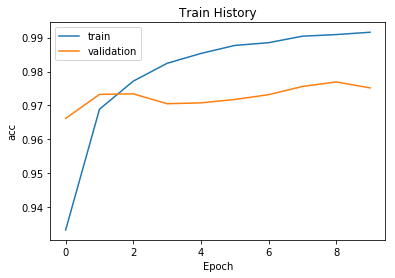

In [16]:
show_train_history(train_history,'acc','val_acc') #顯示訓練過程

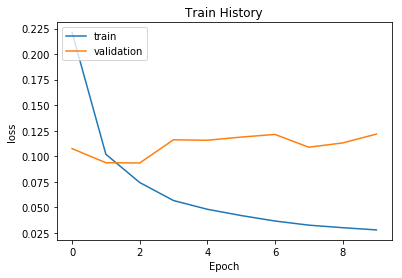

In [17]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [18]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)  #add layer沒有比較好阿??
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 62us/step

accuracy= 0.975
